Saving 3. Predict Disease Outcome Based on Genetic and Clinical Data.csv to 3. Predict Disease Outcome Based on Genetic and Clinical Data (7).csv

📄 First 5 Rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414  

<ipython-input-13-3967e6941dab>:92: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


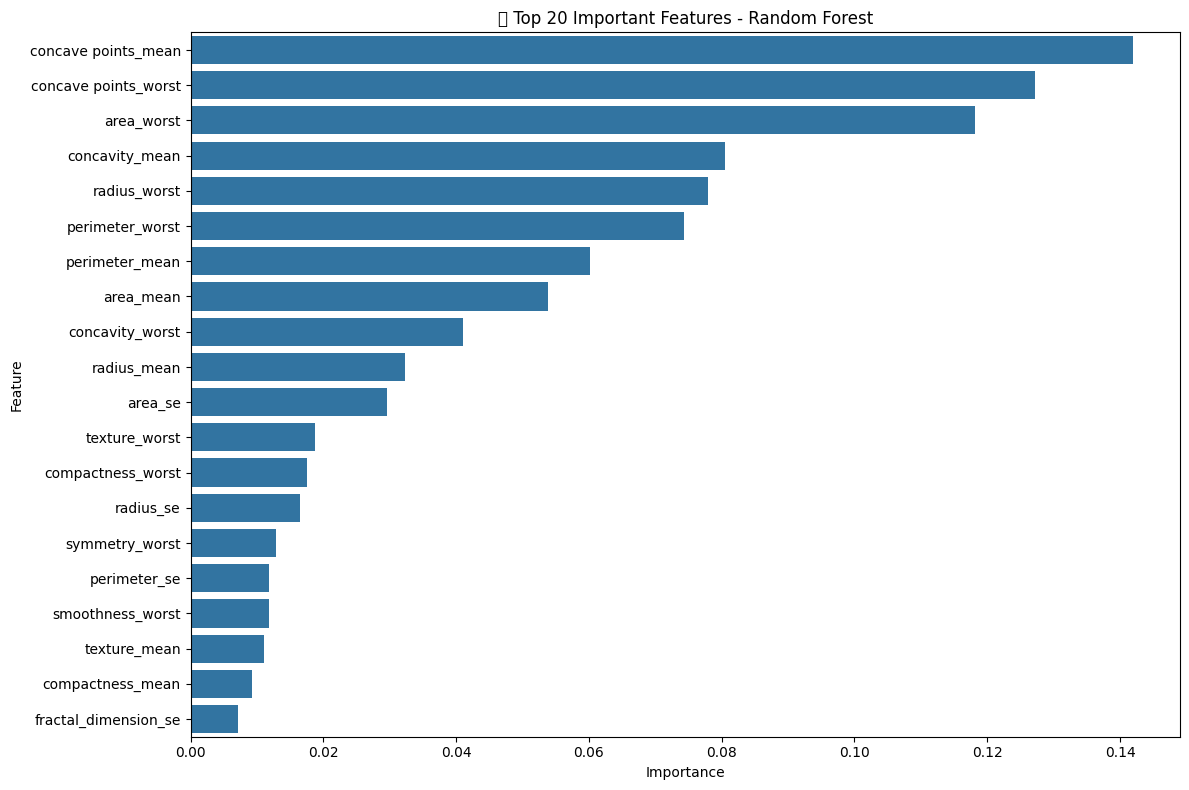

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


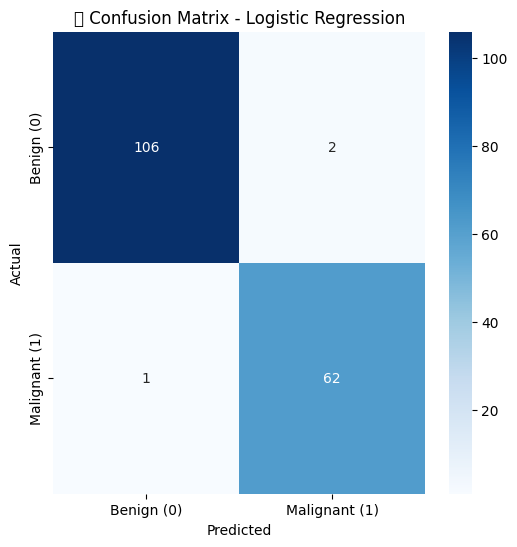

In [13]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Upload the file (Google Colab)
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
data = pd.read_csv(io.BytesIO(uploaded[filename]))

# Basic exploration
print("\n📄 First 5 Rows:")
print(data.head())
print("\n🔍 Data Info:")
print(data.info())
print("\n📊 Class Distribution:")
print(data['diagnosis'].value_counts())

# Encode the target variable
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])  # M=1, B=0

# Drop unnecessary columns
data.drop(['id'], axis=1, inplace=True, errors='ignore')
data.dropna(axis=1, inplace=True)  # Remove any unnamed/missing value columns

# Check for missing values
print("\n🧼 Missing Values:")
print(data.isnull().sum())

# Feature and target split
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to evaluate
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }

    print(f"\n🔎 {name} Results:")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print("📋 Classification Report:")
    print(report)
    print("🧮 Confusion Matrix:")
    print(cm)

# Visualize top features from Random Forest
rf = models["Random Forest"]
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('📊 Top 20 Important Features - Random Forest')
plt.tight_layout()
plt.show()

# Plot confusion matrix for the best performing model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
cm = results[best_model_name]['confusion_matrix']

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title(f'🧾 Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
